# **Exploratory Data Analysis of Deliveries Dataframe**

### **We will be analysing the Deliveries dataset**

In [2]:
# Importing the Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Reading the excel file
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/3. IPL/3. Deliveries Dataset/deliveries.csv')

# **Step 1: Skimming over the Dataset and Analysing the Data**

### **In this step we will be analysing the dataset**

In [4]:
# Shape of the dataset
data_df.shape

(179078, 21)

In [5]:
# Columns in dataset
data_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [6]:
# Info of the dataset
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
# Overview of the dataset
data_df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [8]:
# Print the dataset
data_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


# **Step 2: Analysing our deliveries dataset**

### **In this step we will be analysing the dataset**

# **Objective - Deliveries Dataset**
**1. Total Runs Per IPL Season**

**2. Teams Given target of 200+ in Ist inning and IInd inning**

**3. Runs scored per over by each team**

**4. Players caught most number of catches**

**5. Bowler given most number of wide runs**

**6. Final Conclusion of Deliveries DataFrame**

In [11]:
# Matches dataset
match_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/3. IPL/1. Matches Dataset/matches.csv')

In [13]:
match_df.head(1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


## **Task-1 Total Runs per Season**

### **In this task we will be getting the total runs per season**

In [14]:
# Let's merge the match and deliveries dataset
batsmen_df = match_df[['id', 'Season']].merge(data_df, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [15]:
# Print 5 rows of batsmen df
batsmen_df.head()

,Season,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,IPL-2017,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [17]:
# Get the total season runs
season_total_runs = batsmen_df.groupby(['Season'])['total_runs'].sum().reset_index()

In [18]:
# Print total seasons runs
season_total_runs

,Season,total_runs
0,IPL-2008,17937
1,IPL-2009,16353
2,IPL-2010,18883
3,IPL-2011,21154
4,IPL-2012,22453
5,IPL-2013,22602
6,IPL-2014,18931
7,IPL-2015,18353
8,IPL-2016,18862
9,IPL-2017,18786


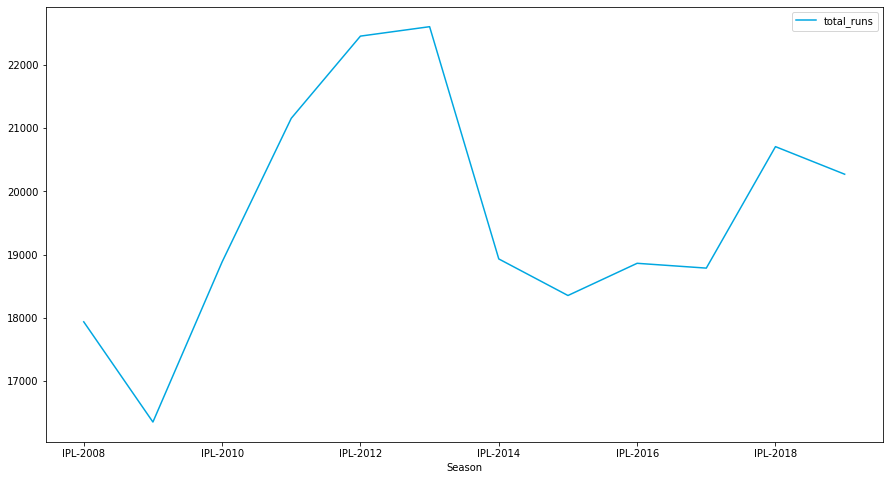

In [19]:
# Let's plot the graph to get clear idea of total runs per season
axes = season_total_runs.plot.line(x = 'Season', y = 'total_runs', color = {"total_runs":"#00a7e1"}, figsize = (15, 8))

In [21]:
import plotly.graph_objs as go

In [22]:
# Let's plot the graph to get better idea
total_runs_graph = go.Bar(x = season_total_runs['Season'], y = season_total_runs['total_runs'], name = 'Total Runs', marker = dict(color = '#00a7e1'))
data = [total_runs_graph]

In [24]:
from plotly.offline import iplot

layout = go.Layout(title = 'Total Runs By Each Season', xaxis = dict(title = 'Ipl Season'), yaxis = dict(title = 'Total Runs'), bargap = 0.2, bargroupgap = 0.1)

figure = go.Figure(data = data, layout = layout)
iplot(figure)

## **Conclusion**

**We can see that in IPL season 2013 - 22602 runs - highest number of runs were scored by teams, followed by the IPL season 2012 - 22453 runs**

## **Task-2 Team given target of 200+ runs**

### **In this task we will be getting the Team given or chased target of 200+ runs**

In [26]:
# Get the teams with more than 200 target runs in first innings
target_runs_df = data_df.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

In [27]:
# Sort the data where runs are greater than 200
target_runs_df = target_runs_df[target_runs_df['total_runs'] >= 200]

In [28]:
# Print to verify
target_runs_df

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,207
16,9,1,Delhi Daredevils,Rising Pune Supergiant,205
38,20,1,Royal Challengers Bangalore,Gujarat Lions,213
62,32,1,Sunrisers Hyderabad,Kings XI Punjab,207
72,36,1,Sunrisers Hyderabad,Kolkata Knight Riders,209
...,...,...,...,...,...
1475,11326,2,Kolkata Knight Riders,Royal Challengers Bangalore,219
1488,11333,1,Royal Challengers Bangalore,Kings XI Punjab,213
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
1499,11338,2,Mumbai Indians,Kolkata Knight Riders,204


In [29]:
# Let's get the teams who given or chased the target of more than 200 runs
teams_target_df = target_runs_df.groupby(['inning', 'batting_team']).count().reset_index()

In [30]:
# Check the columns of df
teams_target_df.columns

Index(['inning', 'batting_team', 'match_id', 'bowling_team', 'total_runs'], dtype='object')

In [31]:
# Drop the extra columns
teams_target_df.drop(columns = ['bowling_team','total_runs'], axis = 1, inplace = True)

In [32]:
# Rename the remaining columns
teams_target_df.rename(columns = {"match_id" : "total_times"}, inplace = True)

In [33]:
# Print df
teams_target_df

,inning,batting_team,total_times
0,1,Chennai Super Kings,11
1,1,Deccan Chargers,1
2,1,Delhi Capitals,1
3,1,Delhi Daredevils,5
4,1,Gujarat Lions,1
5,1,Kings XI Punjab,9
6,1,Kolkata Knight Riders,9
7,1,Mumbai Indians,10
8,1,Rajasthan Royals,5
9,1,Royal Challengers Bangalore,16


In [34]:
# Let's seperate the data by innings for better understanding of successful chase and target
inning_1_target_df = teams_target_df[teams_target_df['inning'] == 1]
inning_2_target_df = teams_target_df[teams_target_df['inning'] == 2]

In [35]:
# Sorting the values
inning_1_target_df.sort_values(by = 'total_times',ascending = False, inplace = True)
inning_2_target_df.sort_values(by = 'total_times',ascending = False, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
# Team which given target of more than 200 runs in ipl
inning_1_target_df = inning_1_target_df.reset_index()
inning_1_target_df.drop(columns = ['index'])

,inning,batting_team,total_times
0,1,Royal Challengers Bangalore,16
1,1,Chennai Super Kings,11
2,1,Mumbai Indians,10
3,1,Kings XI Punjab,9
4,1,Kolkata Knight Riders,9
5,1,Sunrisers Hyderabad,8
6,1,Delhi Daredevils,5
7,1,Rajasthan Royals,5
8,1,Deccan Chargers,1
9,1,Delhi Capitals,1


In [37]:
# Here we can see that Delhi Cpitals and Delhi Daredevils are same team, so let's update the team names and values
# Updating the team names and values
delhi_teams_df = inning_1_target_df.loc[(inning_1_target_df['batting_team'] == 'Delhi Daredevils') | (inning_1_target_df['batting_team'] == 'Delhi Capitals')].reset_index()

In [38]:
delhi_teams_df

,level_0,index,inning,batting_team,total_times
0,6,3,1,Delhi Daredevils,5
1,9,2,1,Delhi Capitals,1


In [39]:
# Add Delhi Daredevil data to Delhi Capitals
delhi_teams_df['total_times'][1] += delhi_teams_df['total_times'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Deop the Delhi Daredevil data
delhi_teams_df.drop(delhi_teams_df.index[(delhi_teams_df['batting_team'] == "Delhi Daredevils")], inplace = True)
delhi_teams_df.drop(columns = ['level_0'], inplace = True)

In [41]:
delhi_teams_df

,index,inning,batting_team,total_times
1,2,1,Delhi Capitals,6


In [42]:
# Lets drop the 'Delhi Daredevils' data from inning_1_target_df
inning_1_target_df.drop(inning_1_target_df.index[(inning_1_target_df["batting_team"] == "Delhi Daredevils")], inplace = True)
inning_1_target_df.drop(inning_1_target_df.index[(inning_1_target_df["batting_team"] == "Delhi Capitals")], inplace = True)

In [43]:
# Let's add updated rows
inning_1_target_df = inning_1_target_df.append(delhi_teams_df.head(1), ignore_index = True)

In [44]:
# Sort the values
inning_1_target_df.sort_values(by = "total_times", ascending = False, inplace = True)

In [45]:
# Reset index and drop extra columns
inning_1_target_df = inning_1_target_df.reset_index()
inning_1_target_df.drop(columns = ['index', 'level_0'], inplace = True)

In [46]:
inning_1_target_df

,inning,batting_team,total_times
0,1,Royal Challengers Bangalore,16
1,1,Chennai Super Kings,11
2,1,Mumbai Indians,10
3,1,Kings XI Punjab,9
4,1,Kolkata Knight Riders,9
5,1,Sunrisers Hyderabad,8
6,1,Delhi Capitals,6
7,1,Rajasthan Royals,5
8,1,Deccan Chargers,1
9,1,Gujarat Lions,1


In [47]:
# Team which successfully chased the target of more than 200 runs
inning_2_target_df

,inning,batting_team,total_times
11,2,Chennai Super Kings,6
13,2,Kings XI Punjab,6
15,2,Mumbai Indians,4
14,2,Kolkata Knight Riders,3
16,2,Rajasthan Royals,3
17,2,Royal Challengers Bangalore,3
12,2,Delhi Daredevils,2
18,2,Sunrisers Hyderabad,2


In [48]:
# Let's update the name of delhi daredevil to delhi capitals in 2nd innings
inning_2_target_df['batting_team'][12] = 'Delhi Capitals'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
inning_2_target_df

,inning,batting_team,total_times
11,2,Chennai Super Kings,6
13,2,Kings XI Punjab,6
15,2,Mumbai Indians,4
14,2,Kolkata Knight Riders,3
16,2,Rajasthan Royals,3
17,2,Royal Challengers Bangalore,3
12,2,Delhi Capitals,2
18,2,Sunrisers Hyderabad,2


In [50]:
# Graph of teams given target and chase target of 200 runs
given_target = go.Bar(x = inning_1_target_df['batting_team'], y = inning_1_target_df['total_times'], name = 'Ist Innings', marker = dict(color = '#0B6E4F'))
chase_target = go.Bar(x = inning_2_target_df['batting_team'], y = inning_2_target_df['total_times'], name = '2nd Innings', marker = dict(color = '#08A045'))
data = [given_target, chase_target]

In [51]:
layout = go.Layout(title = 'Target 200+ Ist inning and 2nd inning', xaxis = dict(title = 'IPL Teams'), yaxis = dict(title = 'Total Times'), bargap = 0.2, bargroupgap = 0.1)

figure = go.Figure(data = data, layout = layout)
iplot(figure)

## **Conclusion**

**From graph above, we can conclude that 'Royal Challenger Bangalore' given 200+ target most number of times - 16 times, followed by the 'Chennai Super Kings' - 11 times in Ist innings and 'Mumbai Indians' - 10 times in Ist innings**

**Whereas in IInd innings 'Chennai Super Kings & Kings XI Punjab' successfully chased 200+ target most number of times - 6 times,  followed by the 'Mumbai Indians' - 4 times**

## **Task-3 Runs per over by each team**

### **In this task we will be getting the Runs per over by each team**

In [53]:
# Get the batting teams
data_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [54]:
# Get the bowling teams
data_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [55]:
# First let's update the deliveries data (teams)
data_df.loc[data_df['batting_team'] == "Delhi Daredevils", "batting_team"] = "Delhi Capitals"
data_df.loc[data_df['batting_team'] == "Rising Pune Supergiants", "batting_team"] = "Rising Pune Supergiant"
data_df.loc[data_df['batting_team'] == "Pune Warriors", "batting_team"] = "Rising Pune Supergiant"

In [56]:
data_df.loc[data_df['bowling_team'] == "Delhi Daredevils", "bowling_team"] = "Delhi Capitals"
data_df.loc[data_df['bowling_team'] == "Rising Pune Supergiants", "bowling_team"] = "Rising Pune Supergiant"
data_df.loc[data_df['bowling_team'] == "Pune Warriors", "bowling_team"] = "Rising Pune Supergiant"

In [57]:
# Let's check the updated data
data_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [58]:
data_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala'], dtype=object)

In [60]:
# Get runs per over by each team
runs_per_over = data_df.pivot_table(index = ['over'], columns = 'batting_team', values = 'total_runs', aggfunc = sum)
runs_per_over.reset_index(inplace = True)

In [61]:
# Print runs per over
runs_per_over

batting_team,over,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Rajasthan Royals,Rising Pune Supergiant,Royal Challengers Bangalore,Sunrisers Hyderabad
0,1,870,482,1116,209,1102,103,1256,1088,923,427,1139,691
1,2,1116,614,1406,226,1254,96,1358,1253,1001,501,1257,880
2,3,1293,566,1429,294,1427,115,1424,1449,1142,607,1449,923
3,4,1354,571,1455,269,1505,126,1473,1539,1238,575,1445,857
4,5,1423,586,1489,267,1469,97,1463,1556,1121,578,1434,943
5,6,1447,598,1341,294,1539,143,1396,1613,1180,630,1387,944
6,7,1159,472,1252,259,1243,89,1207,1162,978,444,1120,698
7,8,1186,539,1234,249,1345,86,1207,1291,1031,518,1328,723
8,9,1246,519,1313,242,1372,88,1240,1371,1093,499,1344,800
9,10,1165,502,1310,245,1320,77,1266,1339,1165,499,1311,788


In [62]:
# Let's plot the graph
team_chennai = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Chennai Super Kings'], name = 'Chennai-Super-Kings', marker = dict(color= "yellow", size = 12))
team_deccan = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Deccan Chargers'], name = 'Deccan-Charges', marker = dict(color= "#2978A0", size = 12))
team_delhi = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Delhi Capitals'], name = 'Dehli-Capitals', marker = dict(color= "#00a7e1", size = 12))
team_gujarat = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Gujarat Lions'], name = 'Gujarat-Lions', marker = dict(color= "orange", size = 12))
team_punjab = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Kings XI Punjab'], name = 'Kings XI Punjab', marker = dict(color= "red", size = 12))
team_kerala = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Kochi Tuskers Kerala'], name = 'Kochi Tuskers Kerala', marker = dict(color= "green", size = 12))
team_kolkata = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Kolkata Knight Riders'], name = 'Kolkata Knight Riders', marker = dict(color= "purple", size = 12))
team_mumbai = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Mumbai Indians'], name = 'Mumbai Indians', marker = dict(color= "blue", size = 12))
team_rajasthan = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Rajasthan Royals'], name = 'Rajasthan Royals', marker = dict(color= "pink", size = 12))
team_pune = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Rising Pune Supergiant'], name = 'Rising Pune Supergiant', marker = dict(color= "#70CAD1", size = 12))
team_bangalore = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Royal Challengers Bangalore'], name = 'Royal Challengers Bangalore', marker = dict(color= "black", size = 12))
team_hyderabad = go.Scatter(x = runs_per_over['over'], y = runs_per_over['Sunrisers Hyderabad'], name = 'Sunrisers Hyderabad', marker = dict(color= "#FF9B42", size = 12))


data = [team_chennai, team_deccan, team_delhi, team_gujarat, team_punjab, team_kerala, team_kolkata, team_mumbai, team_rajasthan, team_pune, team_bangalore, team_hyderabad]

layout = go.Layout(title = 'Average Run in Each Over', xaxis = dict(tickmode = 'linear', title = "Over"), yaxis = dict(title = "Runs"))

fig = go.Figure(data=data,layout=layout)
iplot(fig)

## **Conclusion**

**From above chart patern we can say that in after power play (upto 6 overs), average runs per over go down at least upto 10 overs**

**Mumbai Indians and Chennai Super Kings top the chart - which measn they are good finisher teams**

## **Task-4 Players caught most number of catches**

### **In this task we will be getting the Players caught most number of catches**

In [66]:
# Get the table data where dismissal kind = caught
caught_df = data_df[data_df['dismissal_kind'] == "caught"]

In [67]:
# Drop the extra columns
caught_df = caught_df[['match_id', 'dismissal_kind', 'fielder']]

In [68]:
# Print caught df
caught_df

,match_id,dismissal_kind,fielder
11,1,caught,Mandeep Singh
64,1,caught,Sachin Baby
94,1,caught,Sachin Baby
165,1,caught,DA Warner
206,1,caught,Yuvraj Singh
...,...,...,...
178908,11415,caught,SN Thakur
178921,11415,caught,SK Raina
178945,11415,caught,F du Plessis
179019,11415,caught,Q de Kock


In [69]:
# Let's count the player who caught most number of catches
caught_fielder_df = caught_df.groupby('fielder')['match_id'].count()

In [70]:
# Reset the index of df
caught_fielder_df = caught_fielder_df.reset_index()

In [71]:
# Rename the columns
caught_fielder_df.rename(columns = {'match_id' : 'total_catches'}, inplace = True)

In [72]:
caught_fielder_df

,fielder,total_catches
0,A Ashish Reddy,8
1,A Chandila,2
2,A Chopra,2
3,A Flintoff,3
4,A Hales,2
...,...,...
486,YV Takawale,13
487,Yashpal Singh,3
488,Younis Khan,1
489,Yuvraj Singh,29


In [73]:
# Let's get the players who caught more than 50 number of catches
caught_fielder_df = caught_fielder_df[caught_fielder_df['total_catches'] > 50]

In [74]:
# Print the caught fielders
caught_fielder_df

,fielder,total_catches
18,AB de Villiers,93
21,AC Gilchrist,51
35,AM Rahane,54
48,AT Rayudu,53
109,DA Warner,54
116,DJ Bravo,66
199,KA Pollard,76
205,KD Karthik,109
266,MK Pandey,63
276,MS Dhoni,98


In [75]:
# Let's plot the graph of top 10 players
data=[{"y" : caught_fielder_df['total_catches'], "x" : caught_fielder_df['fielder'], "mode" : "markers", "marker" : {"color" : caught_fielder_df['total_catches'], "size" : caught_fielder_df['total_catches'], 'showscale' : True}, "text" : caught_fielder_df['fielder']}]

iplot(data)

## **Conclusion**

**We can say that KD Karthik caught 109 number of catches, followed by the Sk Raina 99 and MS Dhoni 98**

## **Task-5 Bowler given most number of wide runs**

### **In this task we will be getting the blower who given most number of wide runs**

In [76]:
# Get wide bowl and bowlers daya
bowler_df = data_df[['match_id', 'bowler', 'wide_runs']]

In [77]:
# Remove data where wide bowls > 0
bowler_df = bowler_df[bowler_df['wide_runs'] > 0]

In [78]:
bowler_df

,match_id,bowler,wide_runs
4,1,TS Mills,2
78,1,A Choudhary,1
107,1,A Choudhary,1
108,1,A Choudhary,1
146,1,B Kumar,1
...,...,...,...
178888,11415,DJ Bravo,1
178988,11415,SL Malinga,1
178993,11415,MJ McClenaghan,1
179006,11415,MJ McClenaghan,1


In [79]:
# Get the sum of wide runs grouped by bowlers
bowler_df = bowler_df.groupby('bowler')['wide_runs'].sum()

In [80]:
# Reset the index of the new data
bowler_df = bowler_df.reset_index()

In [81]:
bowler_df

,bowler,wide_runs
0,A Ashish Reddy,8
1,A Choudhary,6
2,A Dananjaya,1
3,A Joseph,3
4,A Kumble,26
...,...,...
332,YA Abdulla,12
333,YK Pathan,43
334,YS Chahal,60
335,Yuvraj Singh,12


In [82]:
# Let's get the data of bowlers given wide runs more than 50
bowler_df = bowler_df[bowler_df['wide_runs'] > 50]

In [83]:
bowler_df

,bowler,wide_runs
5,A Mishra,57
7,A Nehra,64
18,AB Dinda,72
46,B Kumar,110
78,DJ Bravo,124
89,DS Kulkarni,99
91,DW Steyn,105
102,Harbhajan Singh,96
105,I Sharma,96
108,IK Pathan,79


In [84]:
# Let's plot the graph of top 10 players
data = [{"y" : bowler_df['wide_runs'], "x" : bowler_df['bowler'], "mode" : "markers", "marker" : {"color" : bowler_df['wide_runs'], "size" : bowler_df['wide_runs'], 'showscale' : True}, "text" : bowler_df['bowler']}]

layout= go.Layout(autosize = True)

fig = go.Figure(data = data, layout = layout)

iplot(fig)

## **Conclusion**

**We can see that Lasith Malinga given 152 runs as wide, followed by the P Kumar 144, and DJ Bravo 124**

# **Final Conclusion of Deliveries Dataframe analysis**

**Data Cleaning**
1. Not much of Data Cleaning is required in deliveries dataset
2. General team names needs to be updated only

## **Exploratory Data Analysis of Deliveries DataFrame**

**Total Runs Per Season**
1. In IPL season 2013 most number of runs were scored, followed by the 2012 season
***This data also be confirmed because of the analysis we did before - which shows the two seasons lasted for most number of days**

##------------------------------------------------------------------##

**Team Given and Chased 200+ runs**
1. RCB and CSK tops the list of 200+ runs given as target to other teams in Ist innings
2. KXIP and CSK tops the list of 200+ runs successfully chased in IInd innings
***Thus from above data we can conclude that CSK is the only team who can give and chase 200+ runs target easily**

##------------------------------------------------------------------##

**Runs Per Over**
1. From RPO Chart patern we can say that in after power play (upto 6 overs), average runs per over go down at least upto 10 overs
2. Mumbai Indians and Chennai Super Kings top the chart - which measn they are good finisher teams
***Mumbai Indians and Chennai Super Kings are two most successfull run scorer teams**

##------------------------------------------------------------------##

**Player Caught Most number of Catches**
1. We can say that KD Karthik caught 109 number of catches, followed by the Sk Raina 99 and MS Dhoni 98

##------------------------------------------------------------------##

**Most number of Wide Balls**
1. Lasith Malinga given 152 runs as wide, followed by the P Kumar 144, and DJ Bravo 124
